# Experiment Tutorial

In [11]:
from shrinkbench.experiment import PruningExperiment

The `DATAPATH` environment variable is used to tell the framework where to look for datasets.

In [2]:
import os
os.environ['DATAPATH'] = '/path/to/data'

In [3]:
from IPython.display import clear_output
clear_output()

We run experiments for our MNIST network for logarithmically spaced compression ratios

In [4]:
for strategy in ['RandomPruning', 'GlobalMagWeight', 'LayerMagWeight']:
    for  c in [1,2,4,8,16,32,64]:
        exp = PruningExperiment(dataset='MNIST', 
                                model='MnistNet',
                                strategy=strategy,
                                compression=c,
                                train_kwargs={'epochs':10})
        exp.run()
        clear_output()

We then collect output from experiment folders and plot the diferent metrics easily

In [5]:
from shrinkbench.plot import df_from_results, plot_df

In [6]:
df = df_from_results('results')

With the provided functions, it is easy to generate plots 

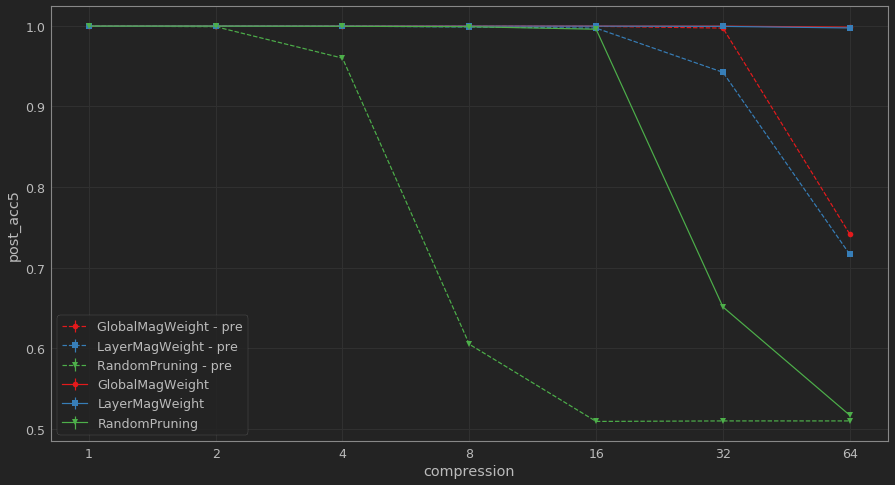

In [7]:
plot_df(df, 'compression', 'pre_acc5', markers='strategy', line='--', colors='strategy', suffix=' - pre')
plot_df(df, 'compression', 'post_acc5', markers='strategy', fig=False, colors='strategy')

We can also check the theoretical speedup and see that layerwise provides larger FLOPS speedups because of the even pruning of the conv layers

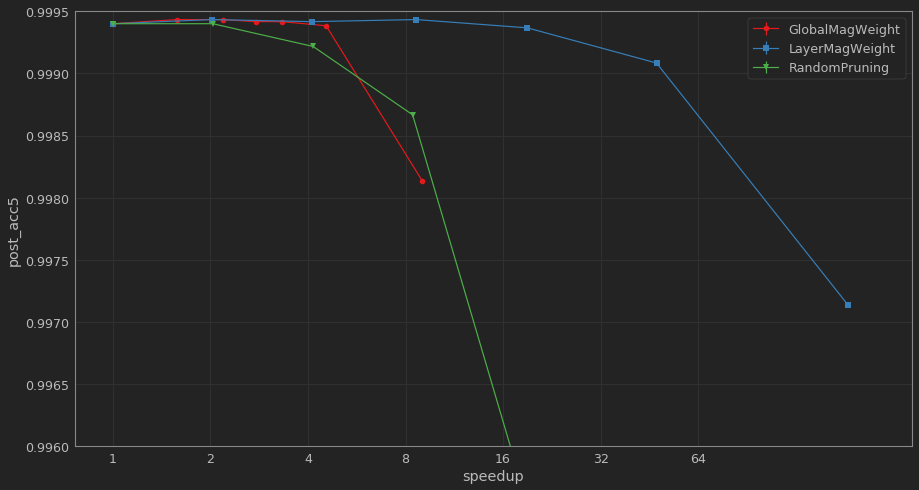

In [8]:
plot_df(df, 'speedup', 'post_acc5', colors='strategy', markers='strategy')
# plt.yscale('log')
plt.ylim(0.996,0.9995)
plt.xticks(2**np.arange(7))
plt.gca().set_xticklabels(map(str, 2**np.arange(7)))
None

We can easily check if the compression is matching our expectation by looking at the relative error. As expected, random pruning does worst.

In [9]:
df['compression_err'] = (df['real_compression'] - df['compression'])/df['compression']

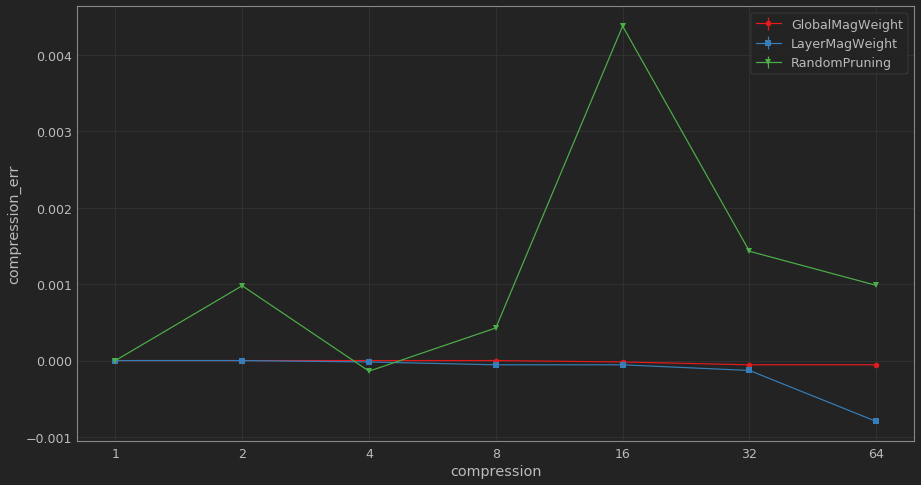

In [10]:
plot_df(df, 'compression', 'compression_err', colors='strategy', markers='strategy')